In [1]:
import pandas as pd
import numpy as np

#### 기획 
각종 질병 및 생활습관에 따른 심장마비 위험도 예측 

### 뇌졸증 환자 예측 
#### 오차행렬

- 양성(Positive): 뇌졸증  환자를 의미.
- 음성(Negative): 정상 환자를 의미.


> True Positive (TP): 모델이 뇌졸증 환자를 올바르게 분류 한 경우
>  
> False Positive (FP): 모델이 정상 환자를 뇌졸증 환자로 잘못 분류한 경우(오진, error I)
>  
> True Negative (TN): 모델이 정상 환자를 정상으로 올바르게 분류한 경우 
> 
> False Negative (FN): 모델이 뇌졸증 환자를 정상으로 잘못 분류한 경우 (놓침, error II)  

> 정밀도 (Precision): 실제 뇌졸증 환자 중에서 모델이 뇌졸증 으로 정확하게 예측한 환자의 비율을 나타낸다. 즉 모델이 얼마나 많은 뇌졸증 환자를 "놓치지 않고" 감지 했는지 측정한다.
> 
> 
> 🏆임계치를 낮춰서 재현율을 높여주는 것이 적합하다.


1) id: unique identifier
2) gender: "Male", "Female" or "Other"
3) age: age of the patient
4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6) ever_married: "No" or "Yes"
7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8) Residence_type: "Rural" or "Urban"
9) avg_glucose_level: average glucose level in blood
10) bmi: body mass index
11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12) stroke: 1 if the patient had a stroke or 0 if not

In [2]:
heart_df = pd.read_csv('./datasets/healthcare-dataset-stroke-data.csv')
heart_df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


#### 데이터 전처리 진행

In [3]:
heart_df = heart_df.drop(columns=['id'])

In [4]:
heart_df.duplicated().sum() # 중복된 행 없음 

0

In [5]:
heart_df.isna().sum() # bmi에서 결측치 존재!

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [6]:
# heart_df['bmi'].describe().T 
mean = heart_df['bmi'].mean()
print(mean)

28.893236911794666


In [7]:
heart_df['bmi'].fillna(mean, inplace=True) # bmi 결측치를 평균 값으로 대체 

In [8]:
heart_df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


In [9]:
heart_df['stroke'].value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

In [10]:
heart_df.isna().sum() # 결측치 없음 

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

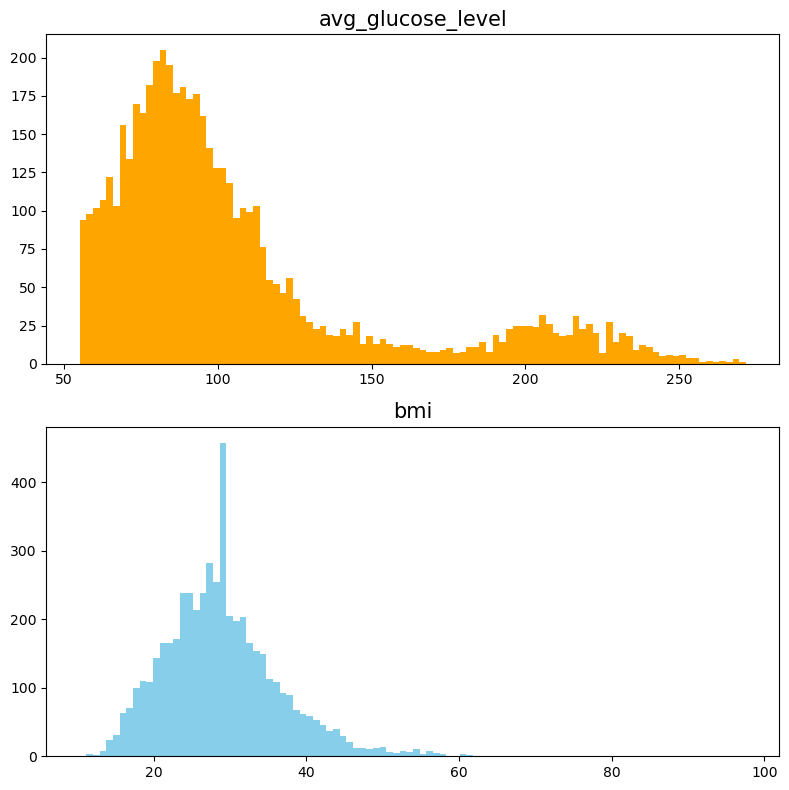

In [11]:
import matplotlib.pyplot as plt

# 서브플롯 생성
fig, axes = plt.subplots(2, 1, figsize=(8, 8))  # 2행 1열의 서브플롯

# 이상치 제거 후 수치형 데이터 시각화 
axes[0].hist(heart_df['avg_glucose_level'], bins=100, color="orange")
axes[0].set_title('avg_glucose_level', fontsize=15)

axes[1].hist(heart_df['bmi'], bins=100, color="skyblue")
axes[1].set_title('bmi', fontsize=15)

plt.tight_layout()
plt.show()


In [12]:
heart_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,5110.0,28.893237,7.698018,10.30,23.800,28.400,32.80,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


In [13]:
# bmi, avg_glucose_level의 이상치 검사 

In [14]:
bmi_df = heart_df.loc[:,'bmi'].reset_index()
bmi_df

,index,bmi
0,0,36.600000
1,1,28.893237
2,2,32.500000
3,3,34.400000
4,4,24.000000
...,...,...
5105,5105,28.893237
5106,5106,40.000000
5107,5107,30.600000
5108,5108,25.600000


In [15]:
avg_df = heart_df.loc[:,'avg_glucose_level'].reset_index()
avg_df

,index,avg_glucose_level
0,0,228.69
1,1,202.21
2,2,105.92
3,3,171.23
4,4,174.12
...,...,...
5105,5105,83.75
5106,5106,125.20
5107,5107,82.99
5108,5108,166.29


In [16]:
from sklearn.preprocessing import StandardScaler
# 데이터의 평균을 0, 분산을 1이 되도록 표준 정규분포를 따르게 하는 스케일링 
# ± 1.96을 벗어나면 이상치로 판단한다.
std = StandardScaler()
std_bmi = std.fit_transform(heart_df[['bmi']])
std_bmi # 표준 정규 분포 결과 

array([[ 1.00123401e+00],
       [ 4.61555355e-16],
       [ 4.68577254e-01],
       ...,
       [ 2.21736316e-01],
       [-4.27845098e-01],
       [-3.49895329e-01]])

In [17]:
from sklearn.preprocessing import StandardScaler
# 데이터의 평균을 0, 분산을 1이 되도록 표준 정규분포를 따르게 하는 스케일링 
# ± 1.96을 벗어나면 이상치로 판단한다.
std = StandardScaler()
std_avg = std.fit_transform(heart_df[['avg_glucose_level']])
std_avg # 표준 정규 분포 결과 

array([[ 2.70637544],
       [ 2.12155854],
       [-0.0050283 ],
       ...,
       [-0.51144264],
       [ 1.32825706],
       [-0.46086746]])

In [18]:
bmi_df['bmi'] = std_bmi
display(bmi_df)
avg_df['avg_glucose_level'] = std_avg
display(avg_df)

,index,bmi
0,0,1.001234e+00
1,1,4.615554e-16
2,2,4.685773e-01
3,3,7.154182e-01
4,4,-6.357112e-01
...,...,...
5105,5105,4.615554e-16
5106,5106,1.442949e+00
5107,5107,2.217363e-01
5108,5108,-4.278451e-01


,index,avg_glucose_level
0,0,2.706375
1,1,2.121559
2,2,-0.005028
3,3,1.437358
4,4,1.501184
...,...,...
5105,5105,-0.494658
5106,5106,0.420775
5107,5107,-0.511443
5108,5108,1.328257


In [19]:
# SkinThickness에 대한 이상치 제거
# a1 = bmi_df['bmi'] >= -1.96
# a2 = bmi_df['bmi'] <= 1.96
# a = a1 & a2

# # 첫 번째 조건을 만족하는 pima_df 업데이트
# heart_df = heart_df.loc[heart_df[a].index].reset_index(drop=True)

# BloodPressure에 대한 이상치 제거 (새 조건 적용)
b1 = avg_df['avg_glucose_level'] >= -1.96  # BP_df 대신 업데이트된 pima_df 사용
b2 = avg_df['avg_glucose_level'] <= 1.96
b = b1 & b2

# 두 번째 조건을 만족하는 pima_df 업데이트
heart_df = heart_df.loc[heart_df[b].index].reset_index(drop=True)
heart_df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
1,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
2,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
3,Male,81.0,0,0,Yes,Private,Urban,186.21,29.000000,formerly smoked,1
4,Male,74.0,1,1,Yes,Private,Rural,70.09,27.400000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4613,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
4614,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
4615,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
4616,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


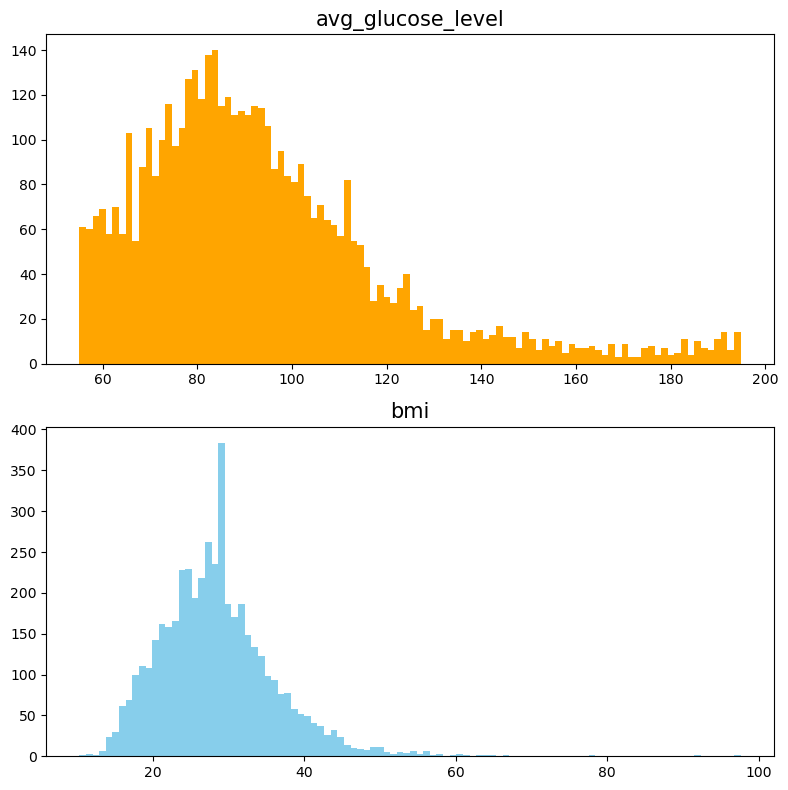

In [20]:
import matplotlib.pyplot as plt

# 서브플롯 생성
fig, axes = plt.subplots(2, 1, figsize=(8, 8))  # 2행 1열의 서브플롯

# 이상치 제거 후 수치형 데이터 시각화 
axes[0].hist(heart_df['avg_glucose_level'], bins=100, color="orange")
axes[0].set_title('avg_glucose_level', fontsize=15)

axes[1].hist(heart_df['bmi'], bins=100, color="skyblue")
axes[1].set_title('bmi', fontsize=15)

plt.tight_layout()
plt.show()


In [21]:
## 범주형 데이터를 수치형으로 변경 >> LabelEncoder() 사용 
heart_enc_df = heart_df.copy() # 범주형 데이터를 수치형으로 변경하기 전 미리 복사를 한다.

In [22]:
from sklearn.preprocessing import LabelEncoder
# 범주형 데이터 -> gender, ever_married, work_type, Residence_type, smoking_status
target_encoder = LabelEncoder()
targets1 = target_encoder.fit_transform(heart_df['stroke'].tolist())
heart_enc_df['stroke'] = targets1

gender_encoder = LabelEncoder()
genders = gender_encoder.fit_transform(heart_df['gender'].tolist())
heart_enc_df['gender'] = genders

marry_encoder = LabelEncoder()
married = marry_encoder.fit_transform(heart_df['ever_married'].tolist())
heart_enc_df['ever_married'] = married

work_encdoer = LabelEncoder()
works = work_encdoer.fit_transform(heart_df['work_type'].tolist())
heart_enc_df['work_type'] = works

residence_encoder = LabelEncoder()
residences = residence_encoder.fit_transform(heart_df['Residence_type'].tolist())
heart_enc_df['Residence_type'] = residences

smoking_encoder = LabelEncoder()
smokes = smoking_encoder.fit_transform(heart_df['smoking_status'].tolist())
heart_enc_df['smoking_status'] = smokes

In [23]:
heart_enc_df # 수치형 데이터로 변경된 결과 

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
1,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
2,0,79.0,1,0,1,3,0,174.12,24.000000,2,1
3,1,81.0,0,0,1,2,1,186.21,29.000000,1,1
4,1,74.0,1,1,1,2,0,70.09,27.400000,2,1
...,...,...,...,...,...,...,...,...,...,...,...
4613,0,80.0,1,0,1,2,1,83.75,28.893237,2,0
4614,0,81.0,0,0,1,3,1,125.20,40.000000,2,0
4615,0,35.0,0,0,1,3,0,82.99,30.600000,2,0
4616,1,51.0,0,0,1,2,0,166.29,25.600000,1,0


In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score

dtc = DecisionTreeClassifier()

features, targets = heart_enc_df.iloc[:,:-1] , heart_enc_df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=124)

dtc = DecisionTreeClassifier(max_depth=6, min_samples_split=16, random_state=124) # 객체 형태로 전달 
dtc.fit(X_train, y_train)

# parameters = {'max_depth' : [10,5,3],'min_samples_split' : [55,75,9]}
# g_dtc = GridSearchCV(dtc, param_grid=parameters, cv=10, refit=True, return_train_score=True)

# # 교차 검증 진행
# g_dtc.fit(X_train, y_train)

# pd.DataFrame(g_dtc.cv_results_)[['params', 'mean_test_score', 'rank_test_score', 
#            'split0_test_score', 'split1_test_score', 'split2_test_score']]

DecisionTreeClassifier(max_depth=6, min_samples_split=16, random_state=124)

In [25]:
dtc.feature_importances_

array([0.        , 0.44981395, 0.        , 0.        , 0.01328545,
       0.        , 0.        , 0.43410017, 0.10280044, 0.        ])

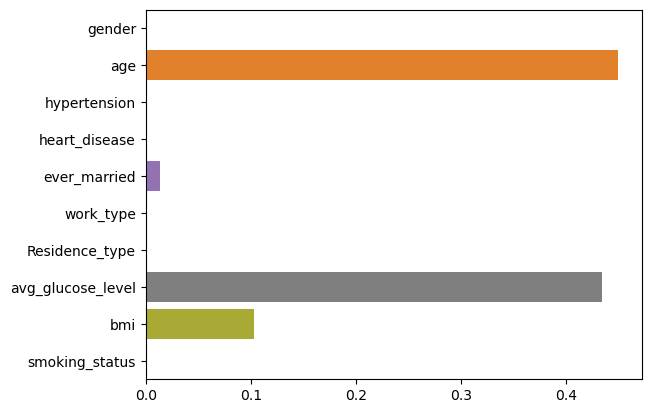

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x=dtc.feature_importances_, y=features.columns)
plt.show()

In [27]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [6, 8, 10, 12, 16, 20, 24],
    'min_samples_split' : [16, 24]
         }
grid_cv = GridSearchCV(dtc, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치: {:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼파라미터: ', grid_cv.best_params_)

# GridSearchCV 객체의 cv_results_ 속성을 데이터 프레임으로 생성
scores_df = pd.DataFrame(grid_cv.cv_results_)
scores_df[['rank_test_score', 'params',   'split0_test_score',
           'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score']]

Fitting 5 folds for each of 14 candidates, totalling 70 fits
GridSearchCV 최고 평균 정확도 수치: 0.9532
GridSearchCV 최적 하이퍼파라미터:  {'max_depth': 6, 'min_samples_split': 16}


,rank_test_score,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score
0,1,"{'max_depth': 6, 'min_samples_split': 16}",0.952639,0.949932,0.958051,0.955345,0.949864
1,2,"{'max_depth': 6, 'min_samples_split': 24}",0.952639,0.949932,0.958051,0.953992,0.948509
2,4,"{'max_depth': 8, 'min_samples_split': 16}",0.951286,0.948579,0.956698,0.951286,0.945799
3,3,"{'max_depth': 8, 'min_samples_split': 24}",0.949932,0.948579,0.956698,0.952639,0.947154
4,10,"{'max_depth': 10, 'min_samples_split': 16}",0.945873,0.939107,0.956698,0.941813,0.940379
5,5,"{'max_depth': 10, 'min_samples_split': 24}",0.948579,0.939107,0.956698,0.947226,0.941734
6,11,"{'max_depth': 12, 'min_samples_split': 16}",0.941813,0.936401,0.955345,0.941813,0.940379
7,6,"{'max_depth': 12, 'min_samples_split': 24}",0.944520,0.937754,0.955345,0.947226,0.941734
8,12,"{'max_depth': 16, 'min_samples_split': 16}",0.939107,0.935047,0.955345,0.941813,0.940379
9,7,"{'max_depth': 16, 'min_samples_split': 24}",0.944520,0.935047,0.955345,0.947226,0.941734


In [28]:
from sklearn.tree import export_graphviz

# 특성 중요도 순서대로 클래스 이름을 가져옵니다.
class_names_str = list(map(str, target_encoder.classes_))

# export_graphviz를 호출하여 결정 트리를 시각화합니다.
export_graphviz(dtc, out_file='./images/stroke_dtc02.dot',
                class_names=class_names_str,
                feature_names=features.columns,
                impurity=True, filled=True)


In [29]:
# 결정 트리를 통해 과적합 분석 
import graphviz

class_names_str = list(map(str, target_encoder.classes_))

with open('./images/stroke_dtc02.dot') as f :
    stroke_dtc02 = f.read()

stroke_dtc02_graph = graphviz.Source(stroke_dtc02)

In [30]:
stroke_dtc02_graph.render(filename="stroke_dtc02", directory="./images", format="png")

'images\\stroke_dtc02.png'

<img src='./images/stroke_dtc02.png'>

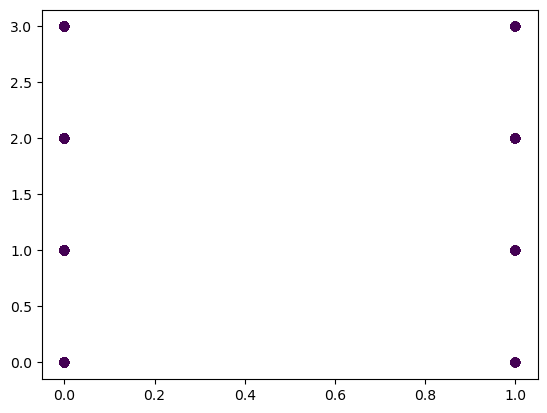

In [31]:
plt.scatter(features.iloc[:,2], features.iloc[:,-1], c=targets)

In [32]:
import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X.values, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow',
                           zorder=1)

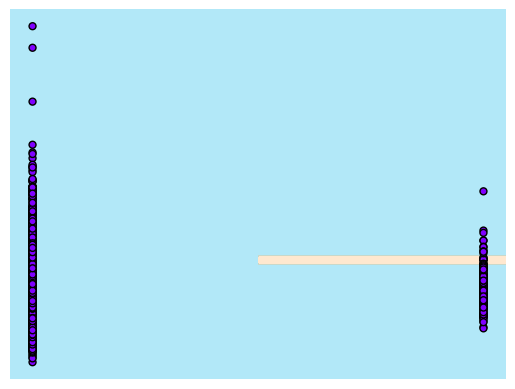

In [33]:
features_2_4 = features.iloc[:,[3,8]]
visualize_boundary(dtc, features_2_4, targets)

In [34]:
features

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,80.0,0,1,1,2,0,105.92,32.500000,2
1,0,49.0,0,0,1,2,1,171.23,34.400000,3
2,0,79.0,1,0,1,3,0,174.12,24.000000,2
3,1,81.0,0,0,1,2,1,186.21,29.000000,1
4,1,74.0,1,1,1,2,0,70.09,27.400000,2
...,...,...,...,...,...,...,...,...,...,...
4613,0,80.0,1,0,1,2,1,83.75,28.893237,2
4614,0,81.0,0,0,1,3,1,125.20,40.000000,2
4615,0,35.0,0,0,1,3,0,82.99,30.600000,2
4616,1,51.0,0,0,1,2,0,166.29,25.600000,1


In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

# 타겟 데이터와 예측 객체를 전달받는다.
def get_evaluation(y_test, prediction, classifier=None, X_test=None):
#     오차 행렬
    confusion = confusion_matrix(y_test, prediction)
#     정확도
    accuracy = accuracy_score(y_test , prediction)
#     정밀도
    precision = precision_score(y_test , prediction)
#     재현율
    recall = recall_score(y_test , prediction)
#     F1 score
    f1 = f1_score(y_test, prediction)
#     ROC-AUC
    roc_auc = roc_auc_score(y_test, prediction)
    
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, ROC-AUC: {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))
    print("#" * 80)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

In [36]:
tree_df = heart_enc_df[['avg_glucose_level','bmi', 'stroke']]
tree_df
# 결정트리 분석 시 feature_importances_ 비중이 가장 높은 상위 2개만 따로 데이터프레임에 저장하기 위해 분류 

,avg_glucose_level,bmi,stroke
0,105.92,32.500000,1
1,171.23,34.400000,1
2,174.12,24.000000,1
3,186.21,29.000000,1
4,70.09,27.400000,1
...,...,...,...
4613,83.75,28.893237,0
4614,125.20,40.000000,0
4615,82.99,30.600000,0
4616,166.29,25.600000,0


In [37]:
from sklearn.metrics import accuracy_score

dtc = grid_cv.best_estimator_
prediction = dtc.predict(X_test)

print(f'정확도: {np.round(accuracy_score(y_test, prediction) * 100, 4)}%')

정확도: 95.8874%


In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score

dtc = DecisionTreeClassifier(max_depth=6, random_state=124)

features, targets = tree_df.iloc[:,:-1] , tree_df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, stratify=targets, random_state=124)
dtc.fit(X_train, y_train)




DecisionTreeClassifier(max_depth=6, random_state=124)

In [39]:
from sklearn.tree import export_graphviz

# 특성 중요도 순서대로 클래스 이름을 가져옵니다.
class_names_str = list(map(str, target_encoder.classes_))

# export_graphviz를 호출하여 결정 트리를 시각화합니다.
export_graphviz(dtc, out_file='./images/stroke_dtc01.dot',
                class_names=class_names_str,
                feature_names=features.columns,
                impurity=True, filled=True)


In [40]:
# 결정 트리를 통해 과적합 분석 
import graphviz

class_names_str = list(map(str, target_encoder.classes_))

with open('./images/stroke_dtc01.dot') as f :
    stroke_dtc01 = f.read()

stroke_dtc01_graph = graphviz.Source(stroke_dtc01)

In [41]:
stroke_dtc01_graph.render(filename="stroke_dtc01", directory="./images", format="png")

'images\\stroke_dtc01.png'

In [42]:
dtc.feature_importances_

array([0.68776254, 0.31223746])

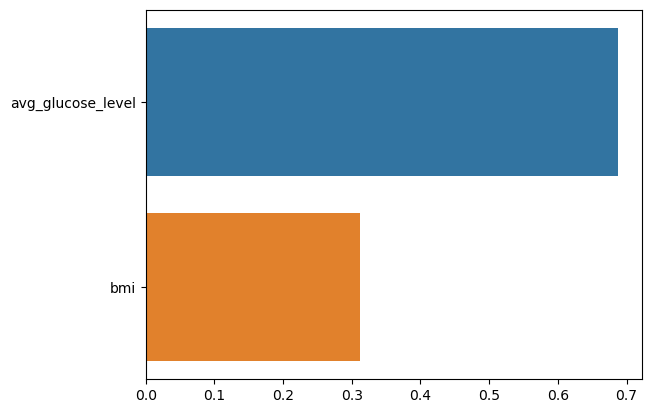

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x=dtc.feature_importances_, y=features.columns)
plt.show()

<img src='./images/stroke_dtc01.png'>

In [44]:
import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X.values, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow',
                           zorder=1)

In [47]:
features_2_4 = features.iloc[:,[2,8]]
visualize_boundary(grid_cv, features_2_4, targets)

IndexError: positional indexers are out-of-bounds

In [ ]:
features

In [ ]:
features.iloc[:,[7,8]]

In [ ]:
features
targets.value_counts()

In [ ]:
from sklearn.metrics import accuracy_score
dtc = heart_dtc.best_estimator_
prediction = dtc.predict(X_test)
accuracy_score(y_test, prediction)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

# 타겟 데이터와 예측 객체를 전달받는다.
def get_evaluation(y_test, prediction, classifier=None, X_test=None):
#     오차 행렬
    confusion = confusion_matrix(y_test, prediction)
#     정확도
    accuracy = accuracy_score(y_test , prediction)
#     정밀도
    precision = precision_score(y_test , prediction)
#     재현율
    recall = recall_score(y_test , prediction)
#     F1 score
    f1 = f1_score(y_test, prediction)
#     ROC-AUC
    roc_auc = roc_auc_score(y_test, prediction)
    
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, ROC-AUC: {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))
    print("#" * 80)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

In [ ]:
get_evaluation(y_test, prediction, dtc, X_test)